In [1]:
import os
import sys
import time
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import mplhep as hep

hep.style.use('ATLAS')

In [2]:
bins_pT = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 2])
bins_pz = np.array([0.3, 0.5, 0.62, 0.75, 0.88, 1.0, 1.2, 1.5,
                    2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 17.0,
                    20.0, 24.0, 28.0, 34.0, 40.0, 48.0, 56.0,
                    68.0, 80.0])

In [3]:
def unit_vector(vector): # Returns the unit vector of the vector.                                                                                            
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2): # Returns the angle in radians between vectors 'v1' and 'v2'                                                                      
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
beam_direction = (0.0, 0.0, 1.0)

In [4]:
evnpath = "/exp/nova/app/users/wmu/ldmcode/bdnmc_events/"
files = [f for f in os.listdir(evnpath)]
num_chi = len(files)
print('Process '+str(num_chi)+' masses')

Process 19 masses


In [5]:
pT_arr = []
pz_arr = []

for i,f in enumerate(files):
        fname = os.path.join(evnpath, f)
        dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
        if dm_mass > 40:
            continue
        
        with open(fname,"r") as fi:
            for line in fi:
                if line.startswith("pion"):
                    rline = line[15:]
                    val   = rline.split()
                    if val:
                        val = [float(i) for i in val]
                    pT = np.sqrt((val[0])**2 + (val[1])**2)
                    pz = val[2]

                    pT_arr.append(pT)
                    pz_arr.append(pz)

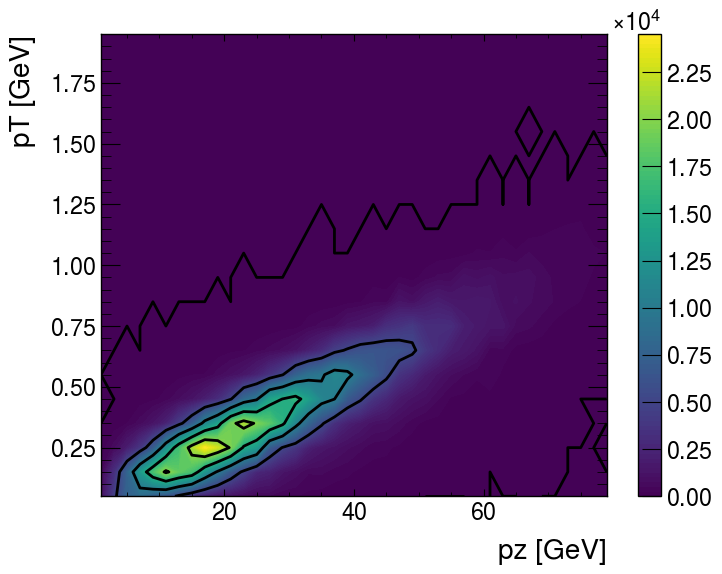

In [6]:
HH, xe, ye = np.histogram2d(pz_arr, pT_arr, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
grid = HH.transpose()
midpoints = (xe[1:] + xe[:-1])/2, (ye[1:] + ye[:-1])/2
fig, ax = plt.subplots()
#h = ax.hist2d(pz_arr, pT_arr, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
CF = ax.contourf(*midpoints, grid, levels=100)#, colors='k', zorder=500)
ax.contour(*midpoints, grid, levels=4, colors='k', zorder=500)
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
fig.colorbar(CF, ax=ax)

fig.show()

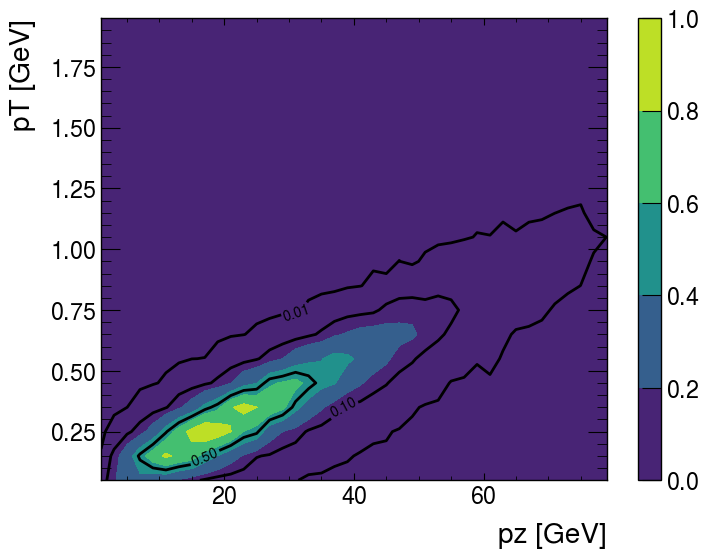

In [31]:
HH, xe, ye = np.histogram2d(pz_arr, pT_arr, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
HH = (HH-HH.min())/(HH.max()-HH.min())
grid = HH.transpose()
midpoints = (xe[1:] + xe[:-1])/2, (ye[1:] + ye[:-1])/2
#levels = [0.01, 0.1, 0.25, 0.5]#, 0.75]
levels = [0.01, 0.1, 0.5]
fig, ax = plt.subplots()
#h = ax.hist2d(pz_arr, pT_arr, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
CF = ax.contourf(*midpoints, grid, levels=5)#, colors='k', zorder=500)
CS = ax.contour(*midpoints, grid, levels=levels, colors='k', zorder=500)
ax.clabel(CS, CS.levels, inline=True,fontsize=10)
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
fig.colorbar(CF, ax=ax)

fig.show()

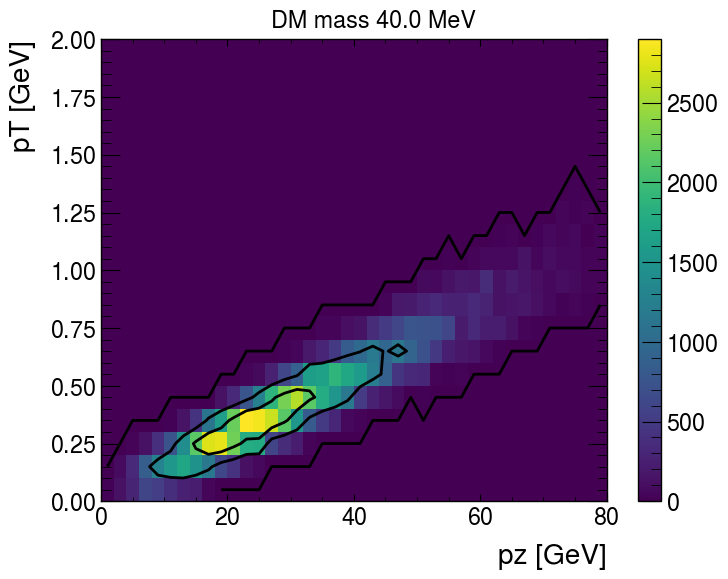

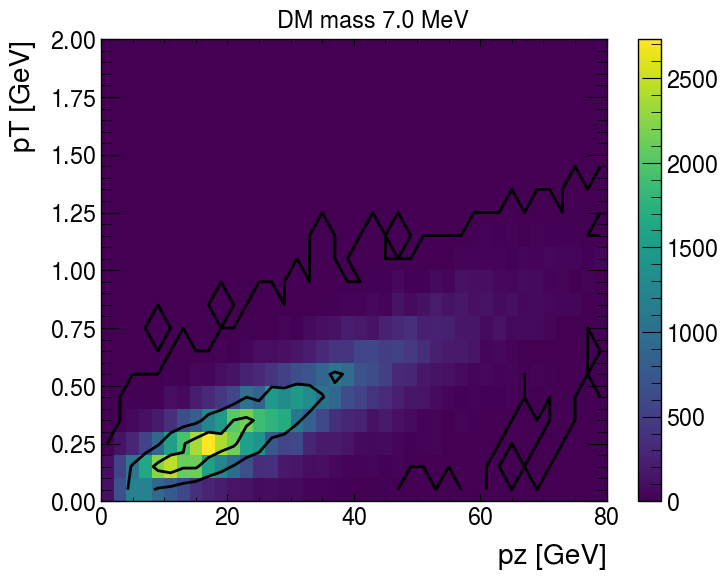

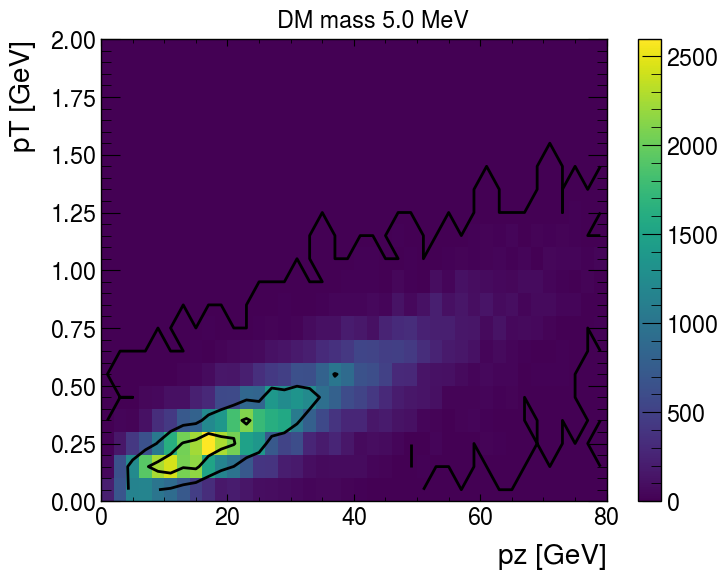

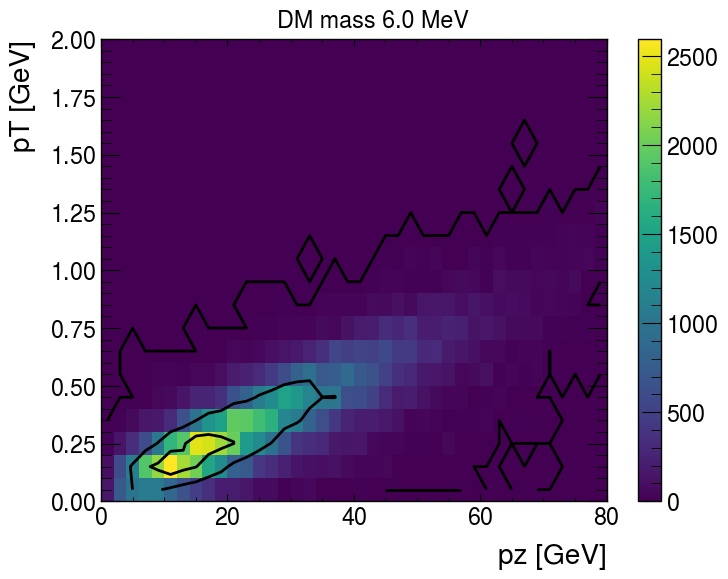

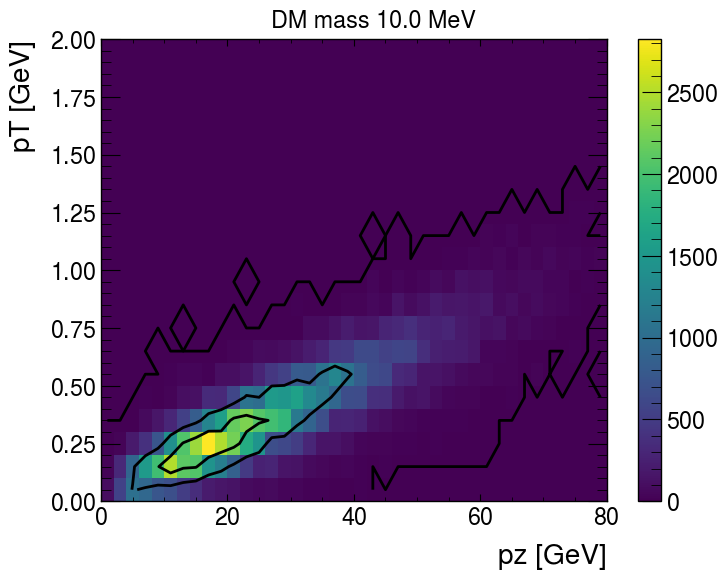

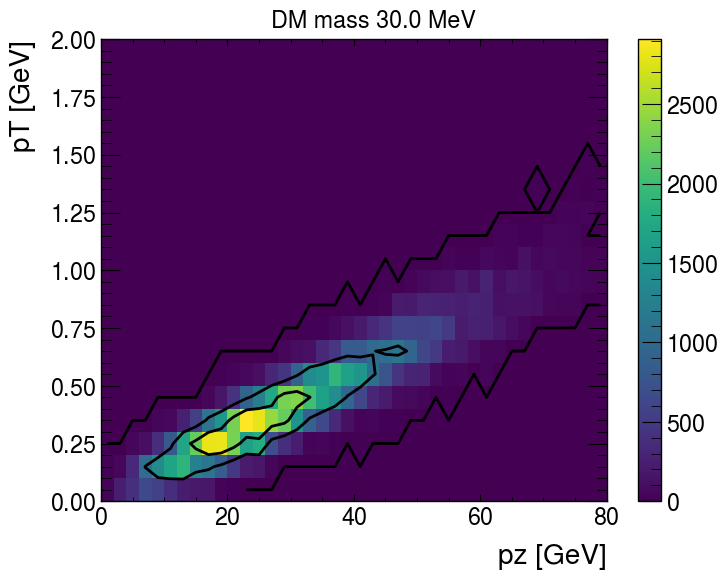

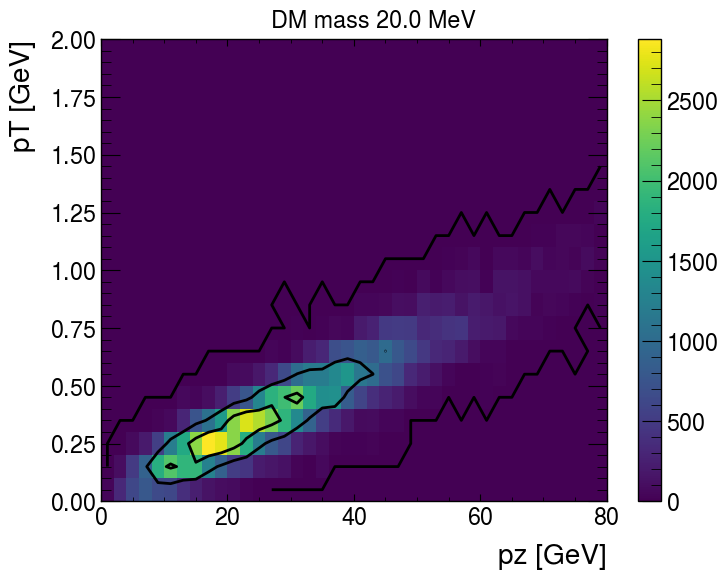

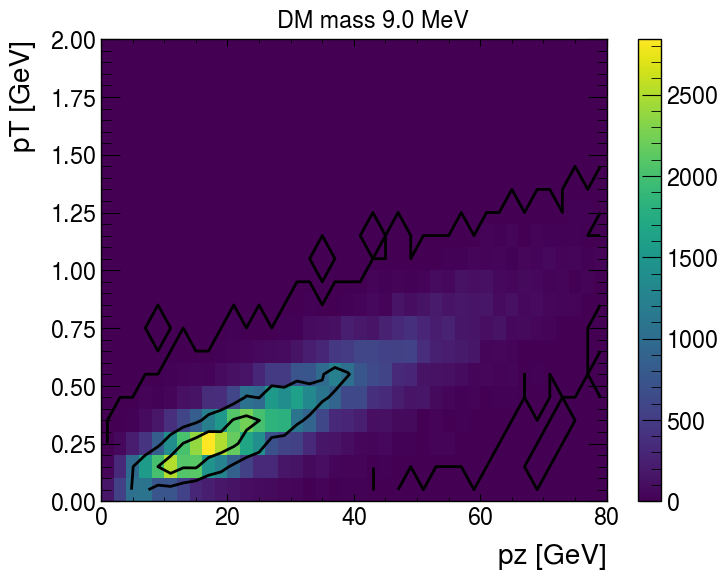

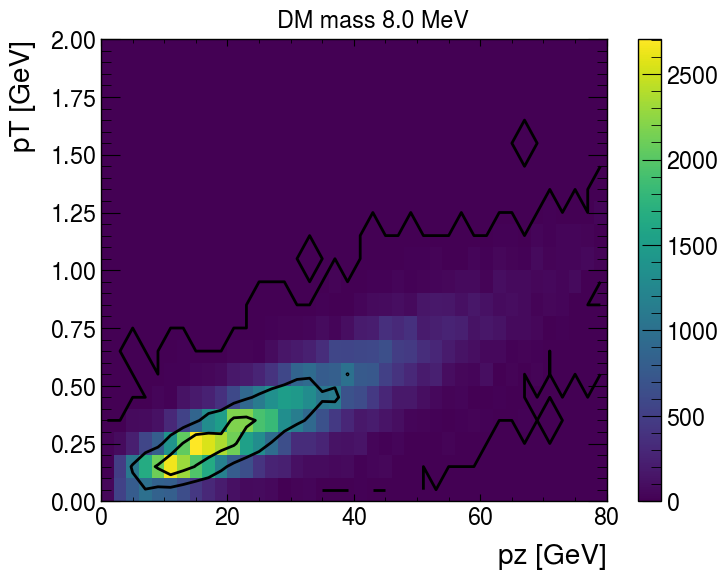

In [7]:
for i,f in enumerate(files):
        fname = os.path.join(evnpath, f)
        dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
        if dm_mass > 40:
            continue
        
        pT_arr_m = []
        pz_arr_m = []
        
        with open(fname,"r") as fi:
            for line in fi:
                if line.startswith("pion"):
                    rline = line[15:]
                    val   = rline.split()
                    if val:
                        val = [float(i) for i in val]
                    pT = np.sqrt((val[0])**2 + (val[1])**2)
                    pz = val[2]

                    pT_arr_m.append(pT)
                    pz_arr_m.append(pz)
        HH, xe, ye = np.histogram2d(pz_arr_m, pT_arr_m, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
        grid = HH.transpose()
        midpoints = (xe[1:] + xe[:-1])/2, (ye[1:] + ye[:-1])/2
        fig, ax = plt.subplots()
        h = ax.hist2d(pz_arr_m, pT_arr_m, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
        ax.contour(*midpoints, grid, levels=2, colors='k', zorder=500)
        ax.set_xlabel('pz [GeV]')
        ax.set_ylabel('pT [GeV]')
        fig.colorbar(h[3], ax=ax)
        fig.suptitle('DM mass {0} MeV'.format(dm_mass))

        fig.show()

In [11]:
MIPP_piplus = np.array([[3.31E-1, 3.25E-1, 1.93E-1, 1.06E-1, 0.0, 0.0],
               [9.2e-2, 1.37e-1, 9.03e-2, 4.92E-2, 1.42E-2, 0.0],
               [6.02E-2, 1.11E-1, 8.26E-2, 4.32E-2, 2.19E-2, 0.0],
               [4.27E-2, 9.19E-2, 7.46E-2, 4.21E-2, 2.16E-2, 0.0],
               [3.42E-2, 7.5E-2, 6.68E-2, 3.82E-2, 1.99E-2, 0.0],
               [3.91E-2, 9.98E-2, 9.27E-2, 5.2E-2, 2.85E-2, 0.0],
               [4.23E-2, 9.12E-2, 1.01E-1, 7.65E-2, 4.76E-2, 0.0],
               [4.01E-2, 8.8E-2, 1.26E-1, 9.94E-2, 6.99E-2, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], # pz = 2-4 GeV
               [1.54E-2, 5.12E-2, 6.47E-2, 6.79E-2, 0.0, 0.0],
               [7.94E-3, 2.69E-2, 3.93E-2, 4.01E-2, 3.11E-2, 0.0],
               [3.99E-3, 1.39E-2, 2.32E-2, 2.46E-2, 2.14E-2, 5.8E-2],
               [2.35E-2, 8.25E-3, 1.5E-2, 1.66E-2, 1.45E-2, 3.78E-2],
               [1.62E-3, 5.84E-3, 1.01E-2, 1.12E-2, 1.01E-2, 2.79E-2],
               [1.78E-3, 5.51E-3, 9.61E-3, 1.19E-2, 1.08E-2, 3.02E-2],
               [1.01E-3, 3.39E-3, 5.73E-3, 7.56E-3, 7.07E-3, 2.2E-2],
               [9.77E-4, 2.84E-3, 4.82E-3, 6.28E-3, 6.53E-3, 2.01E-2],
               [6.89E-4, 1.7E-3, 2.75E-3, 3.57E-3, 3.96E-3, 1.45E-2],
               [5.65E-4, 1.81E-3, 2.5E-3, 3.24E-3, 3.36E-3, 1.34E-2],
               [4.64E-4, 1.18E-3, 1.62E-3, 1.83E-3, 2.05E-3, 8.81E-3],
               [3.98E-4, 7.99E-4, 1.15E-3, 1.33E-3, 1.54E-3, 7.02E-3],
               [1.87E-4, 4.48E-4, 7.06E-4, 7.71E-4, 7.46E-4, 3.88E-3],
               [1.9E-4, 4.24E-4, 5.8E-4, 6.27E-4, 4.84E-4, 2.81E-3],
               [0.0, 0.0, 2.36E-4, 1.88E-4, 1.88E-4, 9.29E-4]])

MIPP_piplus_syst = np.array([[9.77, 4.86, 5.30, 8.15, 0.00, 0.00],
                             [5.10, 4.72, 5.64, 4.77, 8.18, 0.00],
                             [4.94, 4.75, 4.65, 5.62, 5.78, 0.00],
                             [4.74, 4.68, 4.62, 5.50, 4.71, 0.00],
                             [4.74, 4.68, 4.64, 5.57, 8.53, 0.00],
                             [6.21, 4.65, 4.62, 5.65, 5.42, 0.00],
                             [6.27, 4.61, 5.00, 4.64, 5.25, 0.00],
                             [4.62, 4.88, 4.65, 4.71, 4.63, 0.00],
                             [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                             [5.03, 4.67, 4.79, 5.61, 0.00, 0.00],
                             [5.40, 4.64, 4.69, 4.79, 5.92, 0.00],
                             [6.90, 4.89, 4.69, 4.66, 4.66, 6.20],
                             [5.30, 4.67, 4.63, 4.75, 4.70, 5.46],
                             [5.34, 4.89, 4.62, 4.65, 4.68, 4.72],
                             [5.19, 4.78, 5.01, 4.72, 4.64, 4.66],
                             [5.12, 4.71, 4.65, 4.74, 4.70, 4.62],
                             [5.85, 4.73, 4.89, 4.67, 4.66, 4.75],
                             [8.24, 5.06, 5.28, 4.73, 4.82, 4.66],
                             [4.97, 4.74, 4.88, 4.92, 4.61, 4.65],
                             [5.41, 5.42, 4.74, 4.73, 4.68, 4.73],
                             [4.70, 5.22, 4.79, 4.69, 4.93, 4.83],
                             [4.80, 4.99, 4.96, 4.92, 4.69, 4.67],
                             [4.92, 4.65, 5.96, 4.68, 4.76, 4.79],
                             [0.00, 0.00, 5.45, 4.89, 4.80, 4.75]])

MIPP_piplus_stat = np.array([[0.97, 1.05, 1.46, 1.97, 0.00, 0.00],
                             [1.22, 1.18, 1.57, 2.12, 5.39, 0.00],
                             [1.41, 1.33, 1.59, 2.09, 3.12, 0.00],
                             [1.74, 1.48, 1.67, 2.19, 2.84, 0.00],
                             [1.87, 1.69, 1.85, 2.87, 2.90, 0.00],
                             [2.04, 1.83, 2.06, 2.46, 4.18, 0.00],
                             [2.35, 2.07, 2.20, 2.51, 3.11, 0.00],
                             [2.90, 2.44, 2.41, 2.70, 3.14, 0.00],
                             [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                             [11.19, 7.63, 8.72, 9.31, 0.00, 0.00],
                             [4.78, 3.55, 3.82, 3.88, 7.89, 0.00],
                             [3.55, 6.28, 1.70, 1.86, 2.64, 5.87],
                             [4.01, 1.95, 1.72, 2.10, 2.79, 4.18],
                             [4.98, 2.43, 2.00, 2.14, 2.40, 2.96],
                             [4.62, 2.50, 1.88, 1.87, 2.12, 2.15],
                             [5.78, 2.99, 2.17, 2.45, 2.55, 1.88],
                             [5.79, 3.22, 2.98, 2.52, 2.72, 2.02],
                             [6.65, 5.74, 3.92, 3.49, 3.35, 2.05],
                             [11.39, 5.12, 4.06, 3.45, 3.36, 2.13],
                             [8.56, 5.38, 4.20, 3.51, 3.44, 1.88],
                             [9.82, 6.32, 4.63, 4.11, 3.83, 2.01],
                             [11.91, 10.33, 5.87, 5.31, 5.21, 2.46],
                             [11.86, 9.19, 6.28, 5.64, 6.22, 2.77],
                             [0.00, 0.00, 10.32, 10.39, 10.15, 4.69]])

MIPP_piminus = np.array([[2.76E-1, 3.56E-1, 1.91E-1, 9.49E-2, 0.0, 0.0],
                [7.54E-2, 1.44E-1, 9.24E-2, 4.63E-2, 2.23E-2, 0.0],
                [5.14E-2, 1.13E-1, 8.14E-2, 4.33E-2, 2.22E-2, 0.0],
                [3.9E-2, 9.04E-2, 7.11E-2, 4.03E-2, 2.09E-2, 0.0],
                [3.23E-2, 7.25E-2, 6.19E-2, 3.61E-2, 1.93E-2, 0.0],
                [3.65E-2, 9.09E-2, 8.22E-2, 5.25E-2, 3.01E-2, 0.0],
                [3.72E-2, 8.83E-2, 9.32E-2, 6.58E-2, 3.87E-2, 0.0],
                [3.2E-2, 8.2E-2, 1.08E-1, 8.3E-2, 5.61E-2, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [1.74E-2, 4.82E-2, 5.64E-2, 5.79E-2, 0.0, 0.0],
                [8.64E-3, 2.6E-2, 3.47E-2, 3.26E-2, 2.53E-2, 0.0],
                [4.46E-3, 1.2E-2, 1.9E-2, 2.09E-2, 1.72E-2, 4.86E-2],
                [2.63E-2, 8.44E-3, 1.27E-2, 1.4E-2, 1.21E-2, 3.1E-2],
                [1.68E-3, 5.1E-3, 7.65E-3, 9.51E-3, 8.74E-3, 2.21E-2],
                [1.61E-3, 4.73E-3, 7.06E-3, 8.99E-3, 8.2E-3, 2.54E-2],
                [9.19E-4, 2.61E-3, 3.98E-3, 5.11E-3, 5.59E-3, 1.68E-2],
                [6.4E-4, 2.04E-3, 2.91E-3, 4.04E-3, 4.18E-3, 1.51E-2],
                [4.61E-4, 1.14E-3, 1.48E-3, 2.17E-3, 2.5E-3, 1.04E-2],
                [3.88E-4, 8.67E-4, 1.2E-3, 1.62E-3, 2.11E-3, 8.83E-3],
                [2.63E-4, 5.55E-4, 7.23E-4, 8.38E-4, 1.09E-3, 5.25E-3],
                [1.38E-4, 2.92E-4, 4.77E-4, 5.04E-4, 6.55E-4, 3.58E-3],
                [0.0, 1.55E-4, 2.15E-4, 2.19E-4, 3.05E-4, 1.8E-3],
                [0.0, 8.79E-5, 1.71E-4, 1.52E-4, 1.57E-4, 1.03E-3],
                [0.0, 0.0, 0.0, 0.0, 0.0, 3.33E-4]])

MIPP_piminus_syst = np.array([[9.09, 4.93, 5.24, 7.39, 0.00, 0.00],
                              [4.98, 4.70, 5.92, 5.24, 8.33, 0.00],
                              [4.85, 4.74, 4.63, 5.43, 5.47, 0.00],
                              [4.68, 4.65, 4.61, 5.68, 4.77, 0.00],
                              [4.69, 4.62, 4.60, 4.68, 5.04, 0.00],
                              [5.33, 4.64, 4.60, 4.74, 4.63, 0.00],
                              [8.47, 4.62, 4.90, 4.60, 5.40, 0.00],
                              [4.59, 4.93, 4.65, 4.66, 4.63, 0.00],
                              [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                              [5.83, 4.91, 4.86, 4.73, 0.00, 0.00],
                              [6.40, 4.95, 4.62, 4.71, 5.24, 0.00],
                              [7.02, 4.84, 4.73, 4.68, 4.68, 5.19],
                              [8.46, 4.97, 4.62, 4.69, 4.80, 5.17],
                              [5.28, 5.08, 4.72, 4.61, 4.74, 4.70],
                              [5.45, 6.56, 4.68, 4.69, 4.72, 4.61],
                              [6.20, 5.45, 5.10, 4.72, 4.71, 4.69],
                              [10.03, 4.66, 4.67, 5.05, 4.64, 4.65],
                              [4.68, 5.09, 5.29, 4.78, 4.67, 4.67],
                              [5.79, 5.79, 4.74, 4.65, 5.13, 4.61],
                              [4.60, 4.84, 5.10, 4.74, 4.78, 4.69],
                              [5.20, 4.90, 4.61, 5.62, 5.07, 4.63],
                              [0.00, 4.89, 5.22, 5.18, 4.93, 4.66],
                              [0.00, 5.70, 4.69, 5.76, 5.32, 5.04],
                              [0.00, 0.00, 0.00, 0.00, 0.00, 5.06]])

MIPP_piminus_stat = np.array([[0.86, 0.75, 1.09, 1.68, 0.00, 0.00],
                              [1.16, 0.85, 1.14, 1.76, 2.81, 0.00],
                              [1.31, 0.94, 1.12, 1.52, 2.47, 0.00],
                              [1.55, 1.05, 1.18, 1.54, 2.26, 0.00],
                              [1.62, 1.22, 1.33, 1.58, 2.15, 0.00],
                              [1.71, 1.31, 1.41, 1.67, 2.05, 0.00],
                              [1.91, 1.50, 1.60, 1.80, 2.19, 0.00],
                              [2.58, 1.79, 1.73, 1.95, 2.31, 0.00],
                              [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                              [7.94, 4.23, 4.48, 5.64, 0.00, 0.00],
                              [3.46, 2.57, 2.49, 3.14, 6.11, 0.00],
                              [3.22, 8.47, 1.60, 1.91, 2.87, 6.33],
                              [4.12, 2.01, 1.78, 1.91, 2.62, 4.26],
                              [5.10, 2.61, 2.11, 2.12, 2.38, 2.96],
                              [5.05, 2.68, 2.09, 2.01, 2.27, 2.01],
                              [6.85, 3.66, 2.68, 2.73, 2.69, 2.01],
                              [7.74, 4.12, 3.87, 3.10, 2.95, 1.89],
                              [9.09, 7.25, 6.47, 3.92, 3.49, 2.01],
                              [13.69, 8.86, 5.64, 5.02, 3.81, 2.00],
                              [11.23, 7.33, 6.14, 5.63, 4.98, 2.36],
                              [16.11, 10.10, 7.49, 7.10, 6.21, 2.76],
                              [0.00, 13.69, 10.82, 10.36, 8.80, 3.62],
                              [0.00, 16.67, 11.59, 11.85, 11.15, 4.51],
                              [0.00, 0.00, 0.00, 0.00, 0.00, 7.34]])

In [12]:
MIPP_avg = np.zeros_like(MIPP_piplus)
MIPP_avg_syst = np.zeros_like(MIPP_piplus)
MIPP_avg_stat = np.zeros_like(MIPP_piplus)
for i in range(len(MIPP_piplus)):
    for j in range(len(MIPP_piplus[i])):
        MIPP_avg[i][j] = (MIPP_piplus[i][j] + MIPP_piminus[i][j])/2
        MIPP_avg_syst[i][j] = max(MIPP_piplus_syst[i][j], MIPP_piminus_syst[i][j])
        MIPP_avg_stat[i][j] = np.sqrt((MIPP_piplus_stat[i][j])**2 + (MIPP_piminus_stat[i][j])**2)/2
print(np.sum(MIPP_piplus))
print(np.sum(MIPP_piminus))
print(np.sum(MIPP_avg))

4.181476
3.8305849
4.00603045


/tmp/ipykernel_2965/1037647348.py:4: RuntimeWarning: divide by zero encountered in log
  c = ax.pcolormesh(X, Y, np.log(MIPP_avg.T))


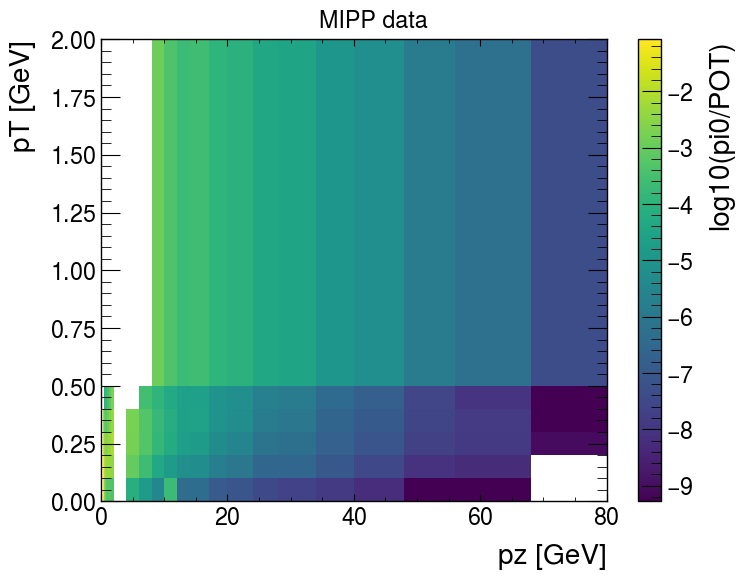

In [42]:
fig = plt.figure()
ax = fig.add_subplot()
X, Y = np.meshgrid(bins_pz, bins_pT)
c = ax.pcolormesh(X, Y, np.log(MIPP_avg.T))
cbar = fig.colorbar(c, ax=ax)
cbar.set_label('log10(pi0/POT)')
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
fig.suptitle('MIPP data')
plt.show()

In [14]:
import BMPT_source
bmpt_source = BMPT_source.BMPT_source()
bmpt_source = bmpt_source.data

In [15]:
pz_bmpt = []
pT_bmpt = []
p_bmpt = []
theta_bmpt = []
print(len(bmpt_source))
for i in range(len(bmpt_source)):
    p = bmpt_source[i][0]
    theta = bmpt_source[i][1]
    pz_bmpt.append(p*math.cos(theta))
    pT_bmpt.append(p*math.sin(theta))
    p_bmpt.append(p)
    theta_bmpt.append(theta)
pz_bmpt = np.array(pz_bmpt)
pT_bmpt = np.array(pT_bmpt)
p_bmpt = np.array(p_bmpt)
theta_bmpt = np.array(theta_bmpt)

8526


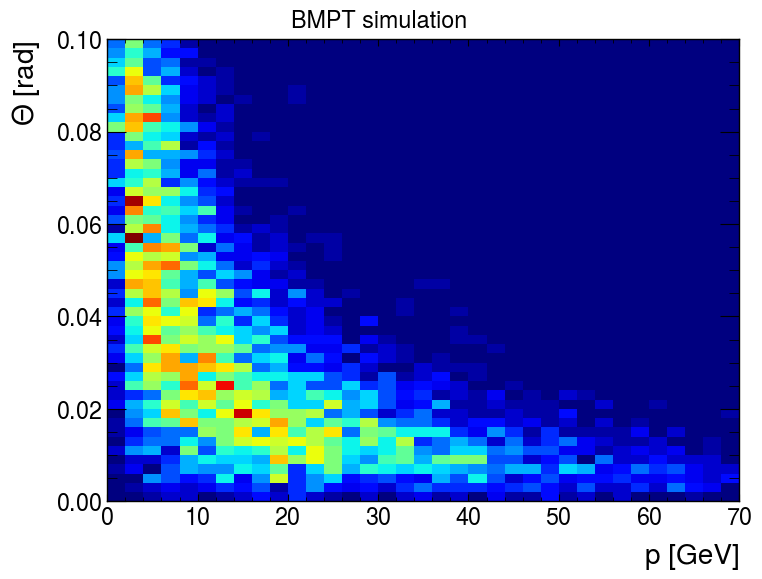

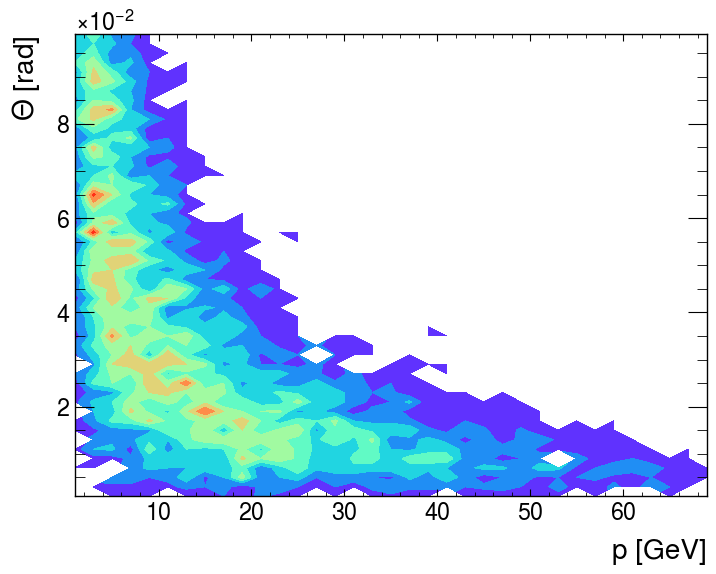

In [39]:
fig, ax = plt.subplots()
ax.hist2d(p_bmpt, theta_bmpt, bins=[np.linspace(0, 70, 36), np.linspace(0, 0.1, 51)],cmap='jet')
ax.set_ylabel('$\Theta$ [rad]')
ax.set_xlabel('p [GeV]')
ax.set_ylim((0, 0.1))
ax.set_xlim((0, 70))
fig.suptitle('BMPT simulation')
fig.show()

HH, xe, ye = np.histogram2d(p_bmpt, theta_bmpt, bins=[np.linspace(0, 70, 36), np.linspace(0, 0.1, 51)])
for i in range(len(HH)):
    for j in range(len(HH[i])):
        if HH[i][j] > 0:
            continue
        else:
            HH[i][j] = float('NaN')
#HH = (HH-HH.min())/(HH.max()-HH.min())
grid = HH.transpose()
midpoints = (xe[1:] + xe[:-1])/2, (ye[1:] + ye[:-1])/2
#levels = [0.01, 0.1, 0.25, 0.5]#, 0.75]
levels = [0.01, 0.1, 0.5]
fig, ax = plt.subplots()
#h = ax.hist2d(pz_arr, pT_arr, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
CF = ax.contourf(*midpoints, grid, levels=8,cmap='rainbow')#, colors='k', zorder=500)
ax.set_xlabel('p [GeV]')
ax.set_ylabel('$\Theta$ [rad]')

fig.show()

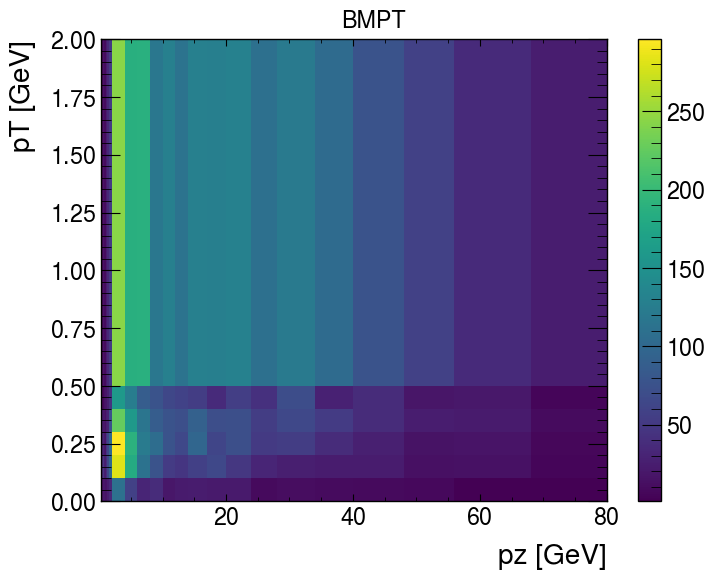

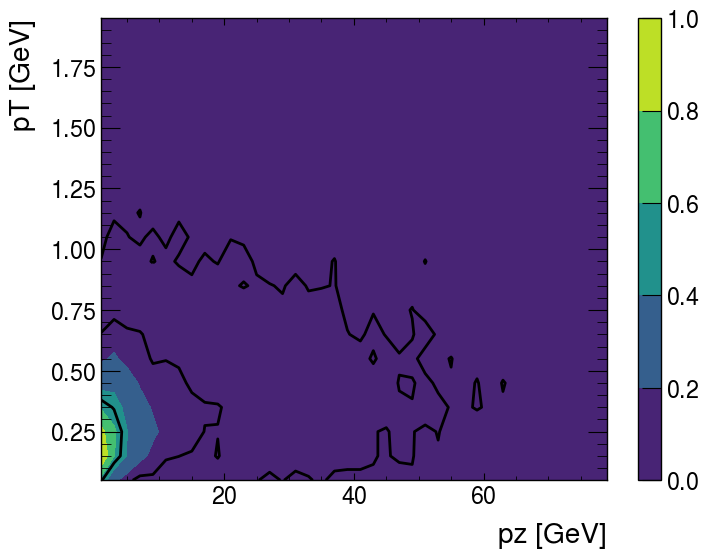

In [43]:
fig, ax = plt.subplots()
h = ax.hist2d(pz_bmpt, pT_bmpt, bins=[bins_pz, bins_pT])
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
#ax.set_xscale('log')
fig.colorbar(h[3], ax=ax)
fig.suptitle('BMPT')

fig.show()

HH, xe, ye = np.histogram2d(pz_bmpt, pT_bmpt, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
HH = (HH-HH.min())/(HH.max()-HH.min())
grid = HH.transpose()
midpoints = (xe[1:] + xe[:-1])/2, (ye[1:] + ye[:-1])/2
#levels = [0.01, 0.1, 0.25, 0.5]#, 0.75]
levels = [0.01, 0.1, 0.5]
fig, ax = plt.subplots()
#h = ax.hist2d(pz_arr, pT_arr, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
CF = ax.contourf(*midpoints, grid, levels=5)#, colors='k', zorder=500)
ax.contour(*midpoints, grid, levels=levels, colors='k', zorder=500)
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
fig.colorbar(CF, ax=ax)

fig.show()

In [18]:
bmpt_hist, xedges, yedges = np.histogram2d(pz_bmpt, pT_bmpt, bins=[bins_pz, bins_pT])
#for i in range(len(MIPP_avg)):
#    for j in range(len(MIPP_avg[i])):
#        if MIPP_avg[i][j] == 0:
#            bmpt_hist[i][j] = 0

bmpt_hist_norm = 0.9*bmpt_hist/np.sum(bmpt_hist) #normalize distribution to 0.9 pi0/POT

MIPP_BMPT_ratio = np.zeros_like(bmpt_hist)
for i in range(len(MIPP_BMPT_ratio)):
    for j in range(len(MIPP_BMPT_ratio[i])):
        if bmpt_hist_norm[i][j] != 0:
            MIPP_BMPT_ratio[i][j] = MIPP_avg[i][j] / bmpt_hist_norm[i][j]

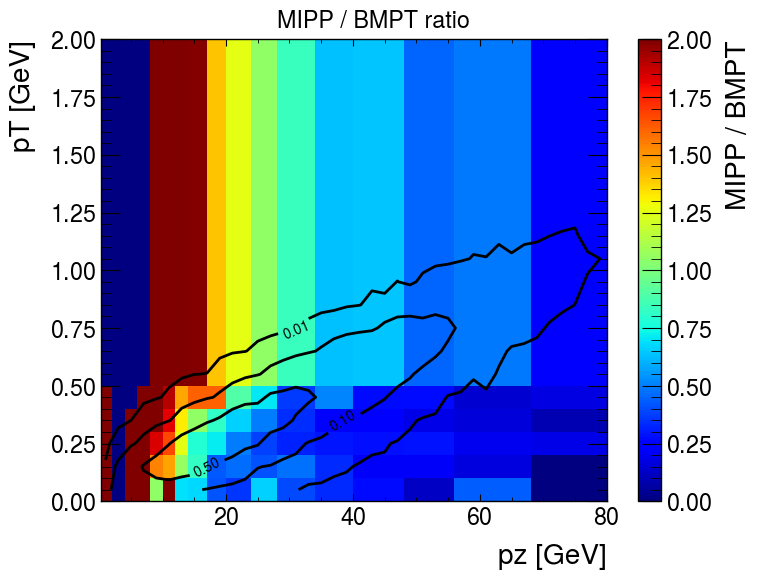

Percentage of events in contour: 82.06992957102761
 
MIPP / BMPT ratios in contour
-----------------------------
0.0
2.5182553713934928
2.1658561507936507
2.7587895212285463
1.5424141414141415
1.8429566137566138
1.4717869658119658
1.67131432748538
1.0673612293144208
1.2522094017094016
1.3189841049382716
0.8237910331384014
0.78805372279496
1.0526621489621488
0.42328205128205126
0.7181571684587813
0.8182956181533647
1.6125870370370372
0.4661981481481482
0.4923103395061728
0.6572629629629629
0.8929327272727273
0.38033137254901955
0.49662431865828094
0.7053021164021165
0.3141954732510288
0.3428584615384615
0.363521578099839
0.23527427350427352
0.5142373015873016
0.2720349849849849
-----------------------------
Average ratio: 0.9670916343915467


In [24]:
HH, xe, ye = np.histogram2d(pz_arr, pT_arr, bins=[np.linspace(0,80,41), np.linspace(0,2,21)])
HH = (HH-HH.min())/(HH.max()-HH.min())
levels = [0.01, 0.1, 0.5]
grid = HH.transpose()
midpoints = (xe[1:] + xe[:-1])/2, (ye[1:] + ye[:-1])/2

fig = plt.figure()
ax = fig.add_subplot()
X, Y = np.meshgrid(bins_pz, bins_pT)
rat = ax.pcolormesh(X, Y, MIPP_BMPT_ratio.T,cmap='jet',vmin=0, vmax=2)
cs = ax.contour(*midpoints, grid, levels=levels, colors='k', zorder=40)
cbar = fig.colorbar(rat)
ax.clabel(cs, cs.levels, inline=True,fontsize=10)
cbar.set_label('MIPP / BMPT')
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
fig.suptitle('MIPP / BMPT ratio')
plt.show()

dat = cs.allsegs[1][0]
ldmevents = 0
totalevents = 0
path = mpl.path.Path(dat)
for i in range(len(HH)):
    for j in range(len(HH[i])):
        xmid = (xe[i] + xe[i+1])/2
        ymid = (ye[j] + ye[j+1])/2
        if path.contains_points([[xmid, ymid]]):
            ldmevents += HH[i][j]
        totalevents += HH[i][j]
print("Percentage of events in contour:", 100*ldmevents/totalevents)
print(" ")

print("MIPP / BMPT ratios in contour")
print("-----------------------------")
binvalues = []
for i in range(len(MIPP_BMPT_ratio)):
    for j in range(len(MIPP_BMPT_ratio[i])):
        xmid = (bins_pz[i] + bins_pz[i+1])/2
        ymid = (bins_pT[j] + bins_pT[j+1])/2
        if path.contains_points([[xmid, ymid]]):
            print(MIPP_BMPT_ratio[i][j])
            binvalues.append(MIPP_BMPT_ratio[i][j])
print("-----------------------------")
print("Average ratio:", np.mean(binvalues))

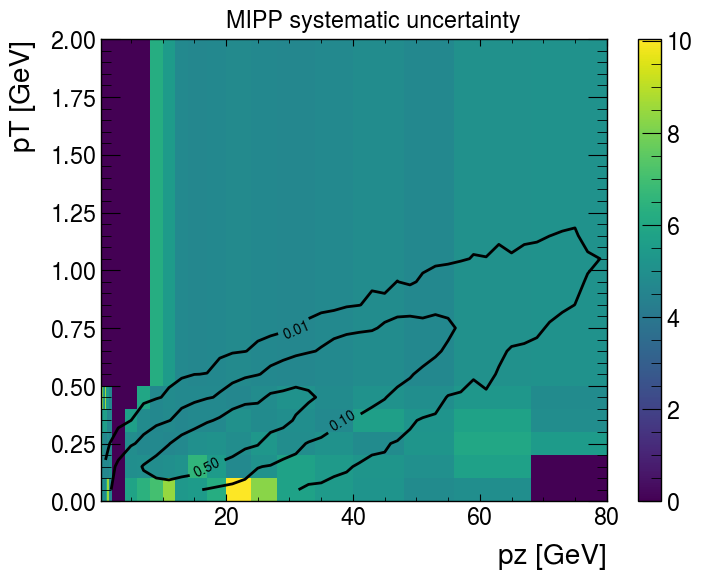

MIPP systematic uncertainty in contour
-----------------------------
0.0 %
4.91 %
4.95 %
4.69 %
4.89 %
4.73 %
4.97 %
4.63 %
5.08 %
4.72 %
4.65 %
6.56 %
5.01 %
4.72 %
5.45 %
5.1 %
4.74 %
4.71 %
4.73 %
4.89 %
5.05 %
4.66 %
5.29 %
4.78 %
4.82 %
4.88 %
4.92 %
5.13 %
4.74 %
4.78 %
5.07 %
-----------------------------
Average: 4.782258064516128 % systematic uncertainty


In [23]:
fig = plt.figure()
ax = fig.add_subplot()
X, Y = np.meshgrid(bins_pz, bins_pT)
systmap = ax.pcolormesh(X, Y, MIPP_avg_syst.T)
cs = ax.contour(*midpoints, grid, levels=levels, colors='k', zorder=40)
cbar = fig.colorbar(systmap)
ax.clabel(cs, cs.levels, inline=True,fontsize=10)
ax.set_xlabel('pz [GeV]')
ax.set_ylabel('pT [GeV]')
fig.suptitle('MIPP systematic uncertainty')
plt.show()

print("MIPP systematic uncertainty in contour")
print("-----------------------------")
binvalues = []
for i in range(len(MIPP_avg_syst)):
    for j in range(len(MIPP_avg_syst[i])):
        xmid = (bins_pz[i] + bins_pz[i+1])/2
        ymid = (bins_pT[j] + bins_pT[j+1])/2
        if path.contains_points([[xmid, ymid]]):
            print(MIPP_avg_syst[i][j],"%")
            binvalues.append(MIPP_avg_syst[i][j])
print("-----------------------------")
print("Average:", np.mean(binvalues), "% systematic uncertainty")

In [26]:
evnpath = "/exp/nova/app/users/wmu/ldmcode/bdnmc_events/"
files = [f for f in os.listdir(evnpath)]
num_chi = len(files)

Etheta2_vals = []
Etheta2_weights = []

E_vals = []
theta_vals = []

allevents = 0
goodevents = 0

for f in files:
    fname = os.path.join(evnpath, f)
    dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
    if dm_mass > 40:
        continue
        
    with open(fname,"r") as fi:
        for line in fi:
            if line.startswith("pion"):                    
                rline = line[15:]
                val   = rline.split()
                if val:
                    val = [float(i) for i in val]
                pT = np.sqrt((val[0])**2 + (val[1])**2)
                pz = val[2]

                allevents += 1
                for pzi in range(len(MIPP_BMPT_ratio)):
                    if pz >= bins_pz[pzi] and pz < bins_pz[pzi+1]:
                        for pTi in range(len(MIPP_BMPT_ratio[pzi])):
                            if pT > bins_pT[pTi] and pT < bins_pT[pTi+1]:
                                if MIPP_BMPT_ratio[pzi][pTi] < 10 and MIPP_BMPT_ratio[pzi][pTi] > 0:
                                    goodevents += 1                                        
                                    for line2 in fi:
                                        if line2.startswith("electron"):
                                            rline = line2[15:]
                                            val   = rline.split()
                                            if val:
                                                val = [float(i) for i in val]
                                            theta = angle_between(beam_direction, (val[0], val[1], val[2]))
                                            E = val[3]                                                    
                                            Etheta2_vals.append(E*theta*theta)
                                            Etheta2_weights.append(MIPP_BMPT_ratio[pzi][pTi])

                                            E_vals.append(E)
                                            theta_vals.append(theta)
                                        if line2.startswith("endevent"):
                                            break
                                else:
                                    for line2 in fi:
                                        if line2.startswith("electron"):
                                            rline = line2[15:]
                                            val   = rline.split()
                                            if val:
                                                val = [float(i) for i in val]
                                            theta = angle_between(beam_direction, (val[0], val[1], val[2]))
                                            E = val[3]                                                    
                                            Etheta2_vals.append(E*theta*theta)
                                            Etheta2_weights.append(1)

                                            E_vals.append(E)
                                            theta_vals.append(theta)
                                        if line2.startswith("endevent"):
                                            break
                    

print("Number of events skipped:", allevents - goodevents)
print("Percentage of events skipped:", 100*(allevents-goodevents)/allevents)

Number of events skipped: 17891
Percentage of events skipped: 1.9878888888888888


In [27]:
Etheta2_nominal = []
E_nominal = []
theta_nominal = []
for f in files:
    fname = os.path.join(evnpath, f)
    dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
    if dm_mass > 40:
        continue

    with open(fname,"r") as fi:
        for line in fi:
            if line.startswith("event"):
                CurrentEventNumber = int(line.split("event ")[1])
            if line.startswith("electron"):                    
                rline = line[15:]
                val   = rline.split()
                if val:
                    val = [float(i) for i in val]
                theta = angle_between(beam_direction, (val[0], val[1], val[2]))
                E = val[3] 
                Etheta2_nominal.append(E*theta*theta)
                E_nominal.append(E)
                theta_nominal.append(theta)

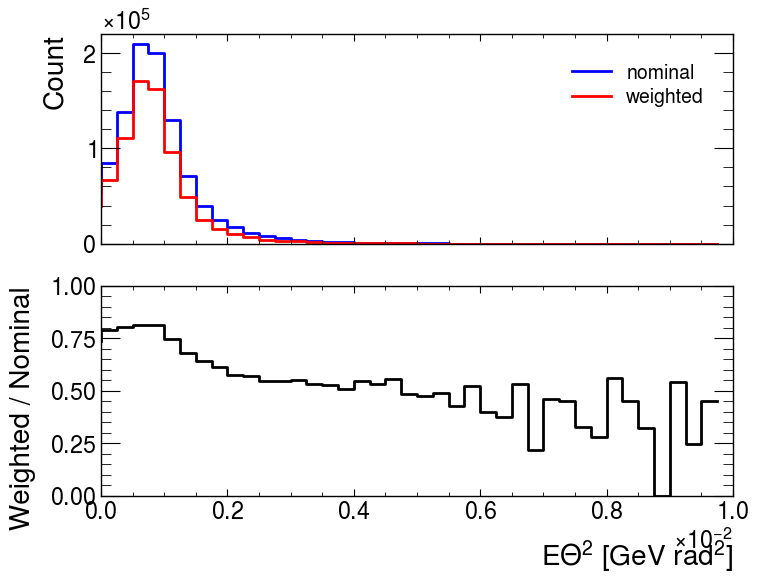

In [20]:
nominal, edges = np.histogram(Etheta2_nominal, bins=np.linspace(0, 0.01, 41))
weighted, edges = np.histogram(Etheta2_vals, bins=np.linspace(0, 0.01, 41), weights=Etheta2_weights)
ratio = []
for i in range(len(nominal)):
    if nominal[i] > 0:
        ratio.append(weighted[i]/nominal[i])
    else:
        ratio.append(0)
        
fig, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.step(edges[:-1], nominal, color='blue',label='nominal')
ax0.step(edges[:-1], weighted, color='red', label='weighted')
ax1.set_xlabel('E$\Theta^2$ [GeV rad$^2$]')
ax1.step(edges[:-1], ratio, color='black')
ax0.set_ylim((0,2.2e5))
ax1.set_ylim((0,1))
ax0.set_ylabel('Count')
ax1.set_ylabel(' Weighted / Nominal')
ax0.legend()
fig.show()

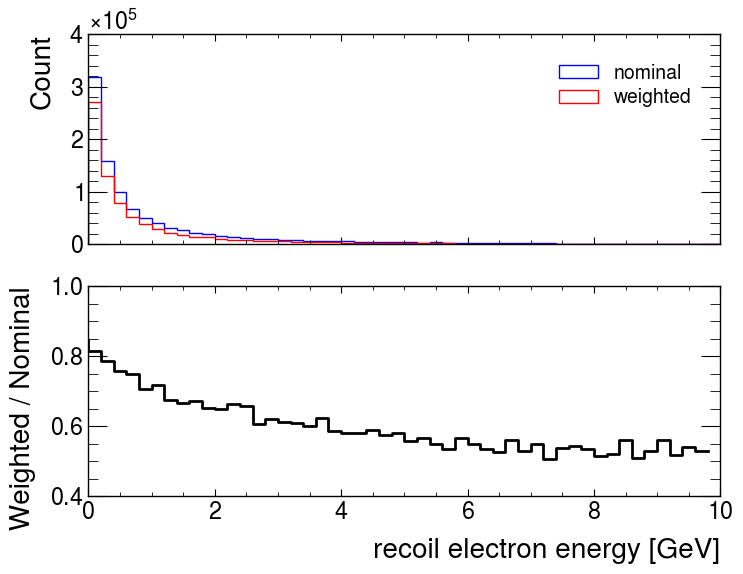

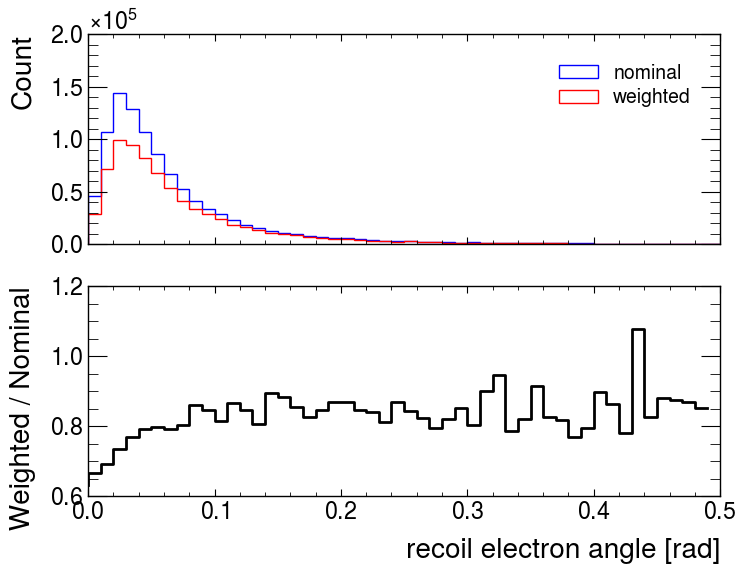

In [28]:
nominal, edges = np.histogram(E_nominal, bins=np.linspace(0, 10, 51))
weighted, edges = np.histogram(E_vals, bins=np.linspace(0, 10, 51), weights=Etheta2_weights)
ratio = []
for i in range(len(nominal)):
    if nominal[i] > 0:
        ratio.append(weighted[i]/nominal[i])
    else:
        ratio.append(0)
        
fig, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.hist(E_nominal, bins=np.linspace(0, 10, 51), color='blue', histtype='step',label='nominal')
ax0.hist(E_vals, bins=np.linspace(0,10,51), weights=Etheta2_weights, color='red', histtype='step', label='weighted')
ax1.set_xlabel('recoil electron energy [GeV]')
ax1.step(edges[:-1], ratio, color='black')
ax0.set_ylabel('Count')
ax1.set_ylabel(' Weighted / Nominal')
ax0.legend()
fig.show()

nominal, edges = np.histogram(theta_nominal, bins=np.linspace(0, 0.5, 51))
weighted, edges = np.histogram(theta_vals, bins=np.linspace(0, 0.5, 51), weights=Etheta2_weights)
ratio = []
for i in range(len(nominal)):
    if nominal[i] > 0:
        ratio.append(weighted[i]/nominal[i])
    else:
        ratio.append(0)
        
fig, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.hist(theta_nominal, bins=np.linspace(0, 0.5, 51), color='blue', histtype='step',label='nominal')
ax0.hist(theta_vals, bins=np.linspace(0,0.5,51), weights=Etheta2_weights, color='red', histtype='step', label='weighted')
ax1.set_xlabel('recoil electron angle [rad]')
ax1.step(edges[:-1], ratio, color='black')
ax0.set_ylabel('Count')
ax1.set_ylabel(' Weighted / Nominal')
ax0.legend()
fig.show()

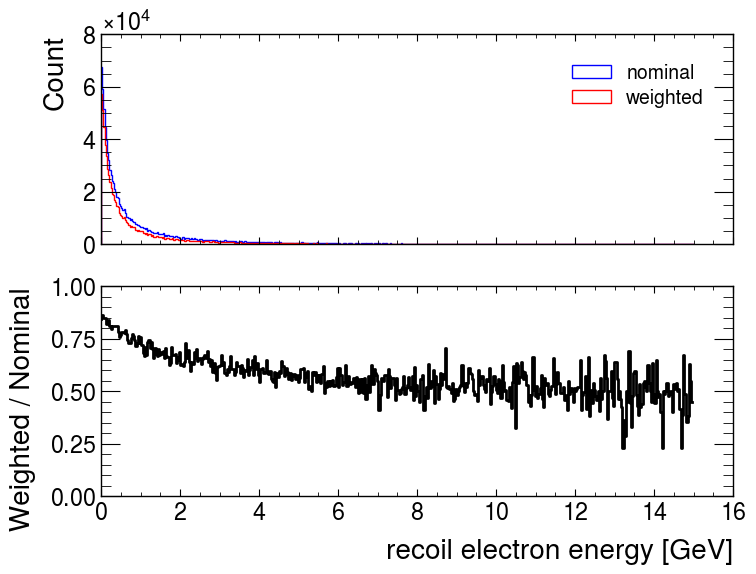

In [30]:
nominal, edges = np.histogram(E_nominal, bins=np.linspace(0, 15, 501))
weighted, edges = np.histogram(E_vals, bins=np.linspace(0, 15, 501), weights=Etheta2_weights)
ratio = []
for i in range(len(nominal)):
    if nominal[i] > 0:
        ratio.append(weighted[i]/nominal[i])
    else:
        ratio.append(0.5)
        
fig, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.hist(E_nominal, bins=np.linspace(0, 15, 501), color='blue', histtype='step',label='nominal')
ax0.hist(E_vals, bins=np.linspace(0,15,501), weights=Etheta2_weights, color='red', histtype='step', label='weighted')
ax1.set_xlabel('recoil electron energy [GeV]')
ax1.step(edges[:-1], ratio, color='black')
ax0.set_ylabel('Count')
ax1.set_ylabel(' Weighted / Nominal')
ax0.legend()
ax1.set_ylim((0,1))
fig.show()

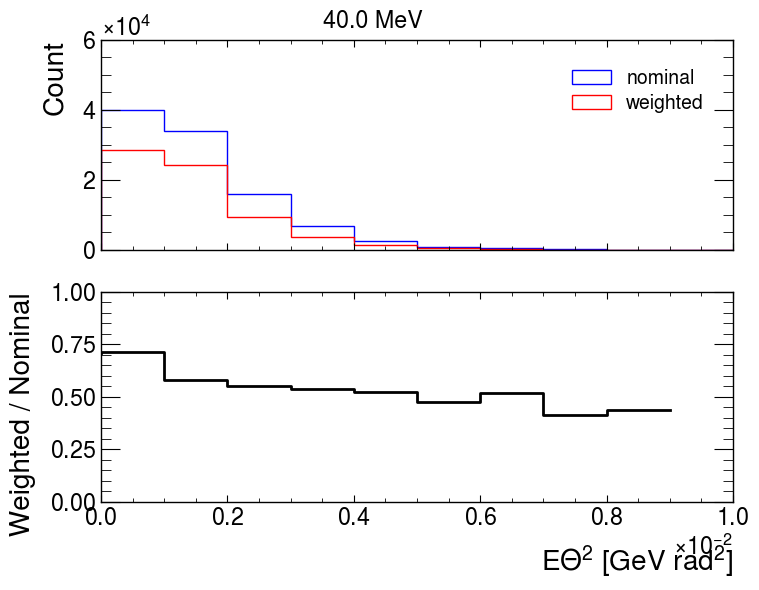

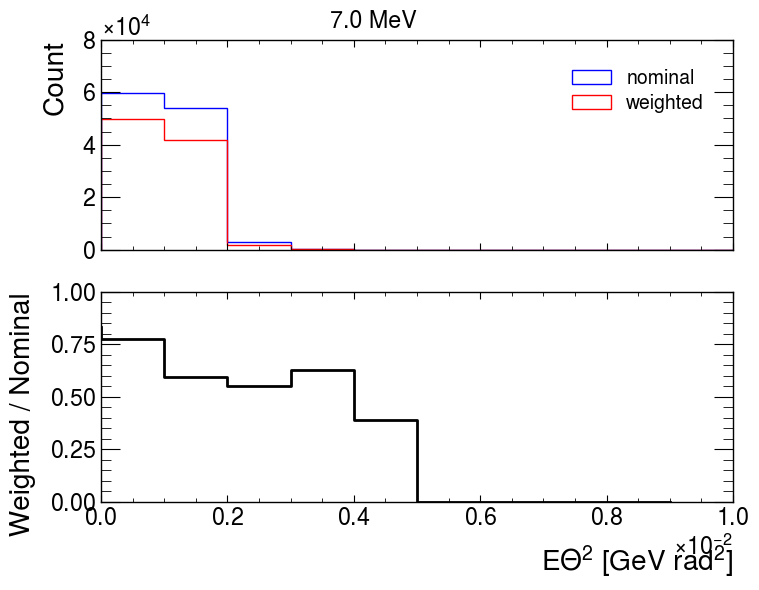

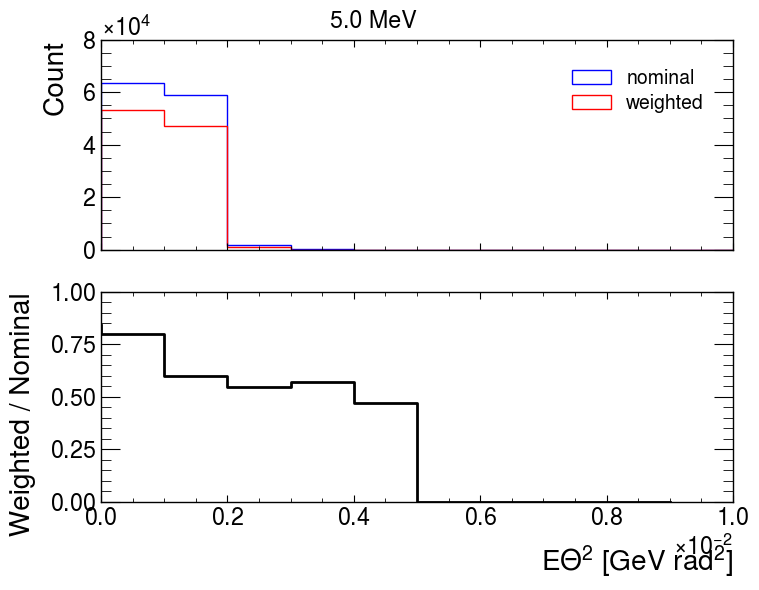

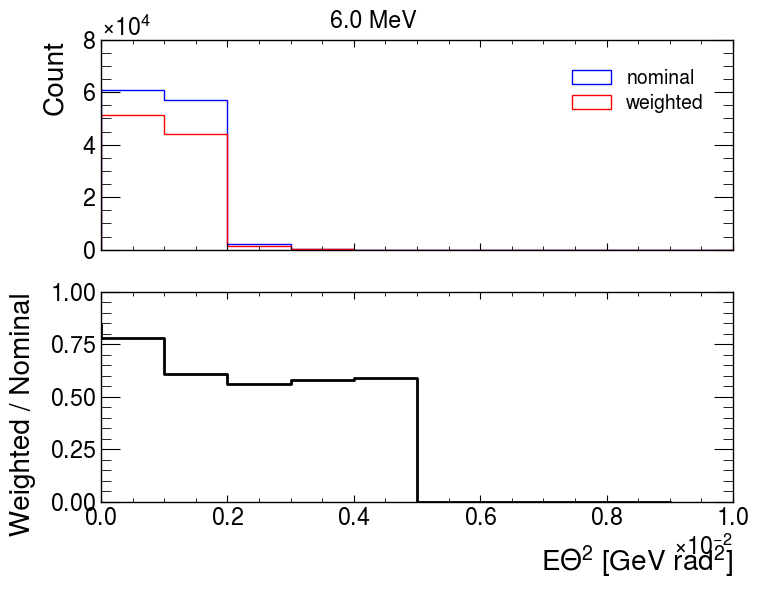

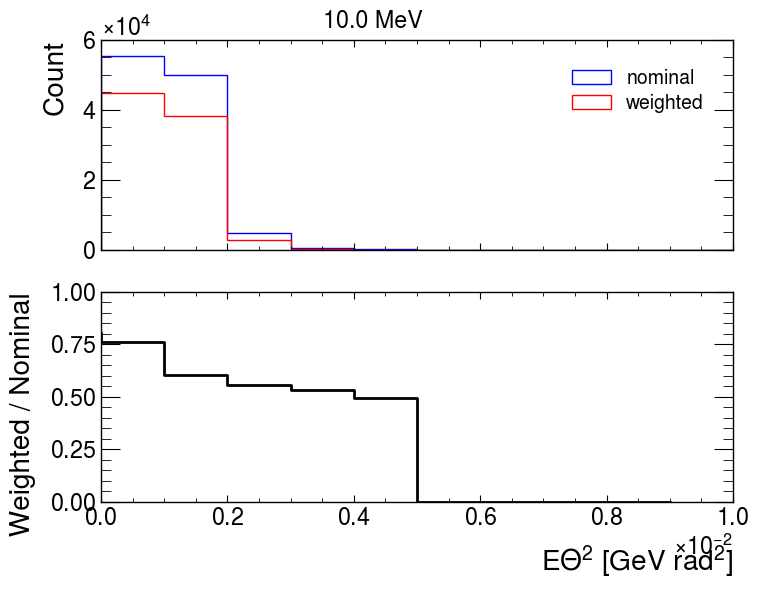

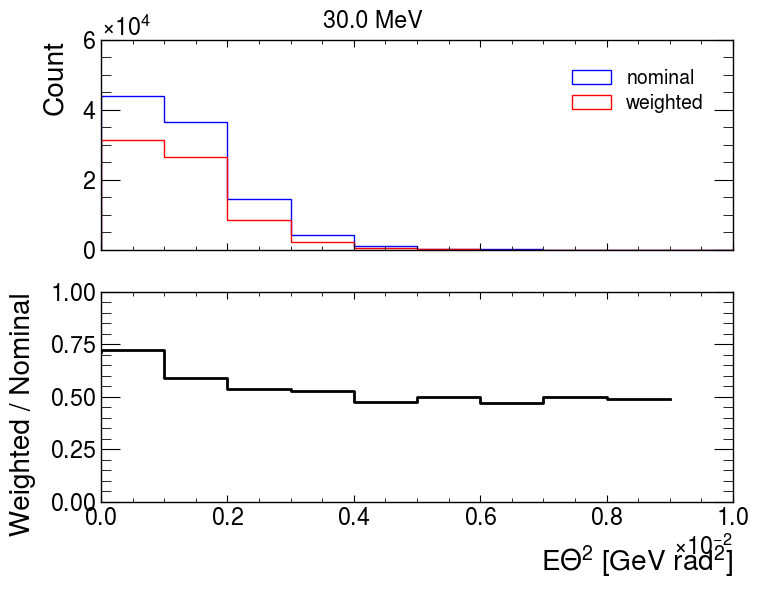

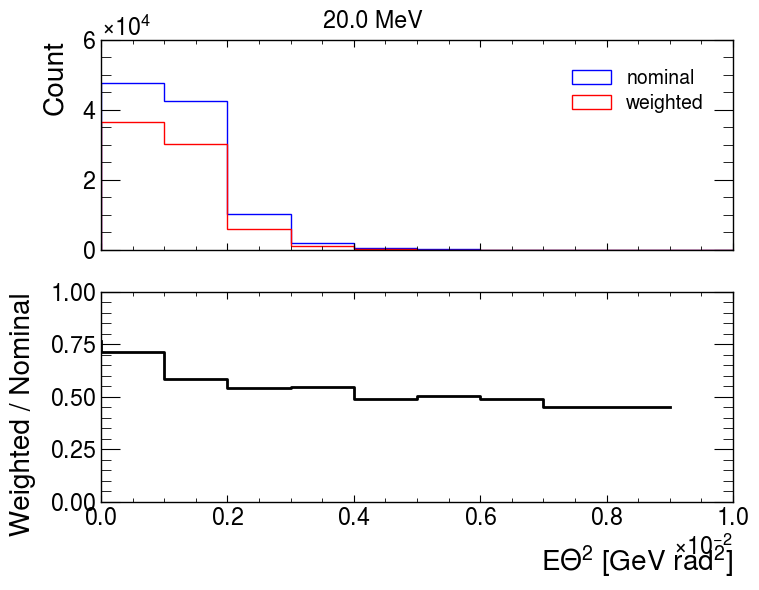

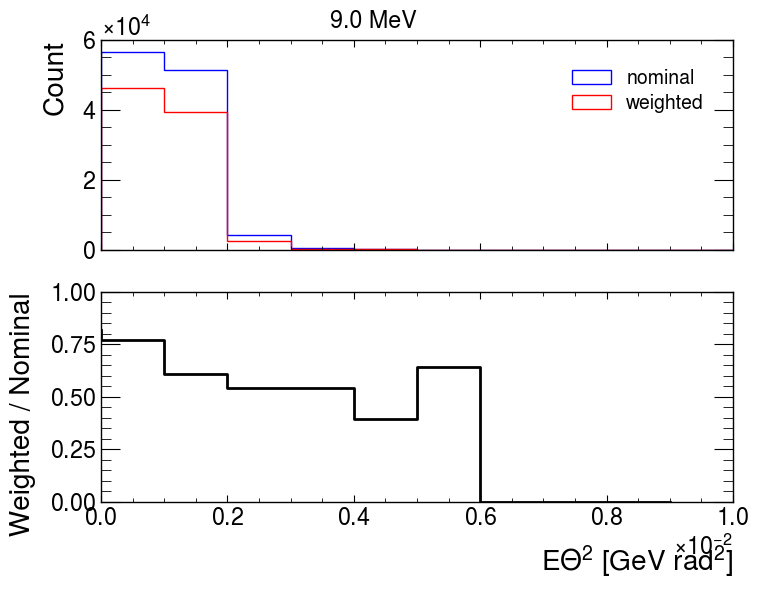

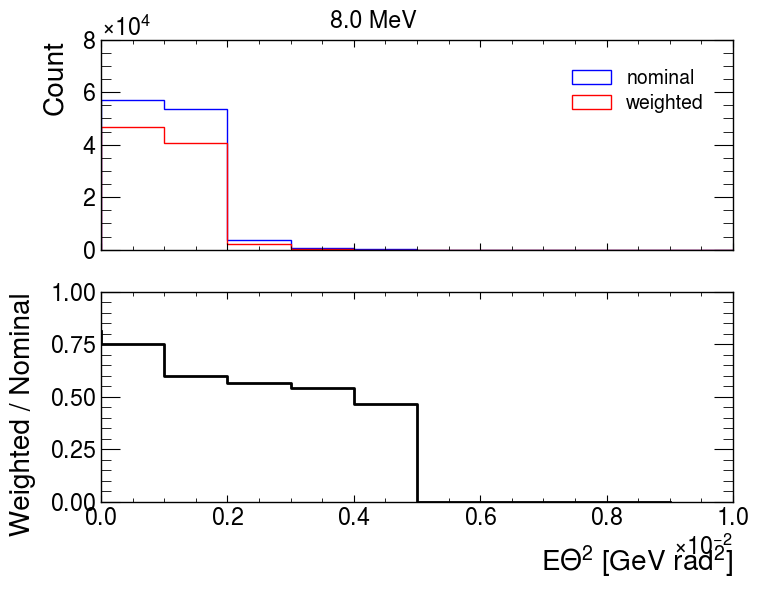

In [22]:
evnpath = "/exp/nova/app/users/wmu/ldmcode/bdnmc_events/"
files = [f for f in os.listdir(evnpath)]
num_chi = len(files)

for f in files:
    Etheta2_vals = []
    E_vals = []
    theta_vals = []

    Etheta2_weights = []
    nominal_weights = []
    
    fname = os.path.join(evnpath, f)
    dm_mass = float((fname.split('events-')[1]).split('.dat')[0])
    if dm_mass > 40:
        continue

    with open(fname,"r") as fi:
        for line in fi:
            if line.startswith("pion"):                    
                rline = line[15:]
                val   = rline.split()
                if val:
                    val = [float(i) for i in val]
                pT = np.sqrt((val[0])**2 + (val[1])**2)
                pz = val[2]

                allevents += 1
                for pzi in range(len(MIPP_BMPT_ratio)):
                    if pz >= bins_pz[pzi] and pz < bins_pz[pzi+1]:
                        for pTi in range(len(MIPP_BMPT_ratio[pzi])):
                            if pT > bins_pT[pTi] and pT < bins_pT[pTi+1]:
                                if MIPP_BMPT_ratio[pzi][pTi] < 10 and MIPP_BMPT_ratio[pzi][pTi] > 0:
                                    for line2 in fi:
                                        if line2.startswith("electron"):
                                            rline = line2[15:]
                                            val   = rline.split()
                                            if val:
                                                val = [float(i) for i in val]
                                            theta = angle_between(beam_direction, (val[0], val[1], val[2]))
                                            E = val[3]                                                    
                                            Etheta2_vals.append(E*theta*theta)
                                            Etheta2_weights.append(MIPP_BMPT_ratio[pzi][pTi])
                                            nominal_weights.append(1)
                                            E_vals.append(E)
                                            theta_vals.append(theta)
                                        if line2.startswith("endevent"):
                                            break
                                else:
                                    for line2 in fi:
                                        if line2.startswith("electron"):
                                            rline = line2[15:]
                                            val   = rline.split()
                                            if val:
                                                val = [float(i) for i in val]
                                            theta = angle_between(beam_direction, (val[0], val[1], val[2]))
                                            E = val[3]                                                    
                                            Etheta2_vals.append(E*theta*theta)
                                            Etheta2_weights.append(1)
                                            nominal_weights.append(1)
                                            E_vals.append(E)
                                            theta_vals.append(theta)
                                        if line2.startswith("endevent"):
                                            break

    nominal, edges = np.histogram(Etheta2_vals, bins=np.linspace(0, 0.01, 11), weights=nominal_weights)
    weighted, edges = np.histogram(Etheta2_vals, bins=np.linspace(0, 0.01, 11), weights=Etheta2_weights)
    ratio = []
    for i in range(len(nominal)):
        if nominal[i] > 0:
            ratio.append(weighted[i]/nominal[i])
        else:
            ratio.append(0)

    fig, (ax0, ax1) = plt.subplots(2, sharex=True)
    ax0.hist(Etheta2_vals, bins=np.linspace(0, 0.01, 11), weights=nominal_weights, color='blue', histtype='step', label='nominal')
    ax0.hist(Etheta2_vals, bins=np.linspace(0, 0.01, 11), weights=Etheta2_weights, color='red', histtype='step', label='weighted')
    ax1.set_xlabel('E$\Theta^2$ [GeV rad$^2$]')
    ax1.step(edges[:-1], ratio, color='black')
    #ax0.set_ylim((0,5e5))
    ax1.set_ylim((0,1))
    ax0.set_ylabel('Count')
    ax1.set_ylabel(' Weighted / Nominal')
    ax0.legend()
    fig.suptitle('{0} MeV'.format(dm_mass))
    fig.show()